In [2]:
import pandas as pd
import numpy as np
import math
from IPython.display import Markdown, display
from scipy.stats import skew
import seaborn as sns
import matplotlib.pyplot as plt    
from dataHack import removeColl 
%matplotlib inline
import warnings
import scipy
warnings.filterwarnings('ignore')
import networkx as nx
%load_ext autotime
def printmd(string):
    display(Markdown(string))
import plotly.offline as py1
py1.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import plotly
import plotly.plotly as py
from plotly.tools import FigureFactory as ff
plotly.tools.set_credentials_file(username='sushant.bharti', api_key='WptZURbEo6AnBZpSHNgO')
plt.style.use('seaborn-bright')

In [3]:
df = pd.read_csv("train.csv").rename(columns={'question1':'q1','question2':'q2','is_duplicate':'is_d'})
df.head() 

,id,qid1,qid2,q1,q2,is_d
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


time: 1.87 s


In [4]:
df[df['is_d']==1].head()

,id,qid1,qid2,q1,q2,is_d
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
11,11,23,24,How do I read and find my YouTube comments?,How can I see all my Youtube comments?,1
12,12,25,26,What can make Physics easy to learn?,How can you make physics easy to learn?,1
13,13,27,28,What was your first sexual experience like?,What was your first sexual experience?,1


time: 296 ms


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id      404290 non-null int64
qid1    404290 non-null int64
qid2    404290 non-null int64
q1      404290 non-null object
q2      404288 non-null object
is_d    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB
time: 175 ms


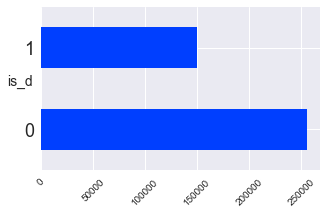

time: 767 ms


In [6]:
fig = plt.figure(figsize=(5, 3))
plt.ylabel('ylabel', fontsize=14,rotation=0)
plt.yticks(fontsize=18)
plt.xticks(rotation=45)
df.groupby("is_d")['id'].count().plot(kind='barh')

   ### Feature EDA
    Let us now construct a few features
    character length of questions 1 and 2
    number of words in question 1 and 2
    normalized word share count.
    We can then have a look at how well each of these separate the two classes.

In [7]:
df.fillna('',inplace=True)

time: 158 ms


In [8]:
df['q1len'] = df['q1'].str.len()
df['q2len'] = df['q2'].str.len()

df['q1_n_words'] = df['q1'].apply(lambda row: len(row.split()))
df['q2_n_words'] = df['q2'].apply(lambda row: len(row.split()))

def normalized_word_share(row):
    w1 = set(map(lambda word: word.lower().strip(), row['q1'].split()))
    w2 = set(map(lambda word: word.lower().strip(), row['q2'].split()))    
    return 1.0 * len(w1 & w2)/(len(w1) + len(w2))


df['word_share'] = df.apply(normalized_word_share, axis=1)

df.head()



,id,qid1,qid2,q1,q2,is_d,q1len,q2len,q1_n_words,q2_n_words,word_share
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12,0.434783
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13,0.200000
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10,0.166667
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9,0.000000
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7,0.100000


time: 20.7 s


In [9]:
def twoplot(df, col, xaxis=None):
    ''' scatter plot a feature split into response values as two subgraphs '''
    if col not in df.columns.values:
        print('ERROR: %s not a column' % col)
    ndf = pd.DataFrame(index = df.index)
    ndf[col] = df[col]
    ndf[xaxis] = df[xaxis] if xaxis else df.index
    ndf['is_d'] = df['is_d']
    plt.rcParams['figure.figsize']=(10,10)
    g = sns.FacetGrid(ndf, col="is_d", hue="is_d")
    g.map(plt.scatter, xaxis, col, alpha=.7, s=1)
    g.add_legend();

    del ndf

time: 8 ms


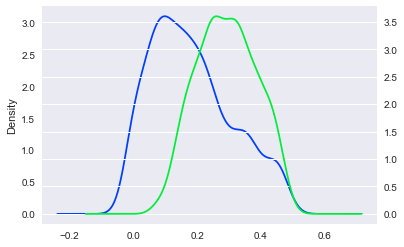

time: 748 ms


In [10]:
ax=df['word_share'][df['is_d']==0].head(1000).plot(kind='kde')
df['word_share'][df['is_d']==1].head(1000).plot(kind='kde', ax=ax, secondary_y=True)
#df[['word_share']][df['is_d']==0].hist(bins=50,ax=ax)
#df[['word_share']][df['is_d']==1].hist(ax=ax,bins=50,secondary_y=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000016B0CFD0>], dtype=object)

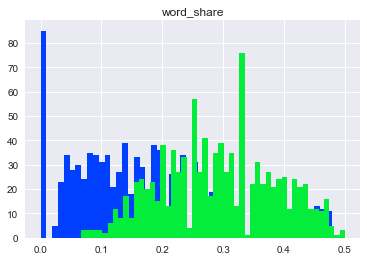

time: 468 ms


In [11]:
plt.figure(figsize=(8,2))
ax=df[['word_share']][df['is_d']==0].head(1000).hist(bins=50)
df[['word_share']][df['is_d']==1].head(1000).hist(ax=ax,bins=50)


In [12]:
df_subsampled = df[0:2000]

trace = go.Scatter(
    y = df_subsampled['q2len'].values,
    x = df_subsampled['q1len'].values,
    mode='markers',
    marker=dict(
        size= df_subsampled['word_share'].values * 60,
        color = df_subsampled['is_d'].values,
        colorscale='Portland',
        showscale=True,
        opacity=0.5,
        colorbar = dict(title = 'duplicate')
    ),
    text = np.round(df_subsampled['word_share'].values, decimals=2)
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Scatter plot of character lengths of question one and two',
    hovermode= 'closest',
        xaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False
    ),
    yaxis=dict(
        title= 'Question 2 length',
        ticklen= 5,
        gridwidth= 2,
        showgrid=False,
        zeroline=False,
        showline=False,
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatterWords')

time: 3.64 s


In [13]:
from sklearn.preprocessing import MinMaxScaler

df_subsampled = df[0:3000]
X = MinMaxScaler().fit_transform(df_subsampled[['q1_n_words', 'q1len', 'q2_n_words', 'q2len', 'word_share']])
y = df_subsampled['is_d'].values

time: 1.28 s


## Model

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(df[['q1len', 'q2len', 'q1_n_words', 'q2_n_words', 'word_share']])

X = scaler.transform(df[['q1len', 'q2len', 'q1_n_words', 'q2_n_words', 'word_share']])
y = df['is_d']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((270874L, 5L), (133416L, 5L), (270874L,), (133416L,))

time: 2.76 s


In [46]:
clf = LogisticRegression()
grid = {
    'C': [1e-6, 1e-3, 1e0],
    'penalty': ['l1', 'l2'],
    'class_weight':['balanced',None]
}
cv = GridSearchCV(clf, grid, scoring='neg_log_loss', n_jobs=-1, verbose=1)
cv.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  1.3min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [1e-06, 0.001, 1.0], 'class_weight': ['balanced', None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_log_loss', verbose=1)

time: 1min 33s


In [47]:
for i in range(1, len(cv.cv_results_['params'])+1):
    rank = cv.cv_results_['rank_test_score'][i-1]
    s = cv.cv_results_['mean_test_score'][i-1]
    sd = cv.cv_results_['std_test_score'][i-1]
    params = cv.cv_results_['params'][i-1]
    print("{0}. Mean validation neg log loss: {1:.3f} (std: {2:.3f}) - {3}".format(
        rank,
        s,
        sd,
        params
    ))

10. Mean validation neg log loss: -0.693 (std: 0.000) - {'penalty': 'l1', 'C': 1e-06, 'class_weight': 'balanced'}
12. Mean validation neg log loss: -0.693 (std: 0.000) - {'penalty': 'l2', 'C': 1e-06, 'class_weight': 'balanced'}
10. Mean validation neg log loss: -0.693 (std: 0.000) - {'penalty': 'l1', 'C': 1e-06, 'class_weight': None}
9. Mean validation neg log loss: -0.690 (std: 0.000) - {'penalty': 'l2', 'C': 1e-06, 'class_weight': None}
7. Mean validation neg log loss: -0.613 (std: 0.001) - {'penalty': 'l1', 'C': 0.001, 'class_weight': 'balanced'}
8. Mean validation neg log loss: -0.616 (std: 0.001) - {'penalty': 'l2', 'C': 0.001, 'class_weight': 'balanced'}
3. Mean validation neg log loss: -0.582 (std: 0.001) - {'penalty': 'l1', 'C': 0.001, 'class_weight': None}
4. Mean validation neg log loss: -0.586 (std: 0.001) - {'penalty': 'l2', 'C': 0.001, 'class_weight': None}
5. Mean validation neg log loss: -0.597 (std: 0.001) - {'penalty': 'l1', 'C': 1.0, 'class_weight': 'balanced'}
6. Mea

In [17]:
print(cv.best_params_)
print(cv.best_estimator_.coef_)

{'penalty': 'l1', 'C': 1.0}
[[-13.61525387   4.0684029   10.47735681 -12.85529641   3.29720523]]
time: 147 ms


C: 1e-06, parameters [[-0.00420471 -0.00232604 -0.0035448  -0.00212959 -0.00186222]] and intercept [-0.03324653]
C: 0.0001, parameters [[-0.16002769 -0.09057568 -0.13239649 -0.08253854  0.68638958]] and intercept [-0.70391433]
C: 1.0, parameters [[-10.36232987  -1.03185774   6.92214406  -7.07278081   3.29850293]] and intercept [-1.32534118]


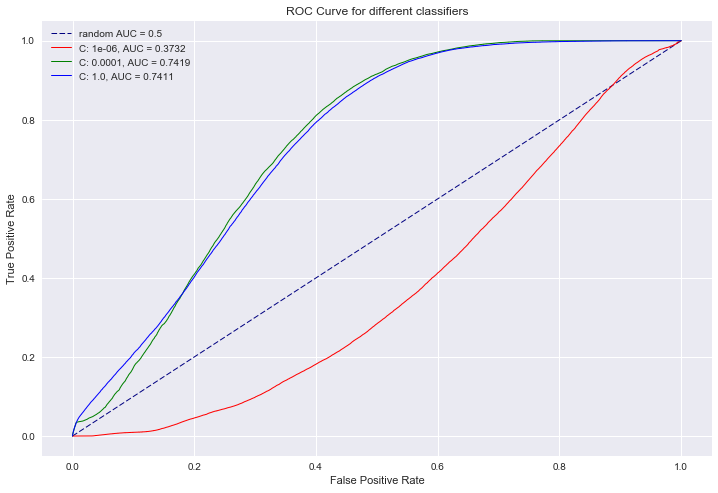

time: 3.01 s


In [18]:
colors = ['r', 'g', 'b', 'y', 'k', 'c', 'm', 'brown', 'r']
lw = 1
Cs = [1e-6, 1e-4, 1e0]

plt.figure(figsize=(12,8))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for different classifiers')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

labels = []
for idx, C in enumerate(Cs):
    clf = LogisticRegression(C = C)
    clf.fit(X_train, y_train)
    print("C: {}, parameters {} and intercept {}".format(C, clf.coef_, clf.intercept_))
    fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=lw, color=colors[idx])
    labels.append("C: {}, AUC = {}".format(C, np.round(roc_auc, 4)))

plt.legend(['random AUC = 0.5'] + labels)

C: 1e-06, parameters [[-0.00118779 -0.00067986 -0.00097385 -0.00061957  0.01369024]] and intercept [-0.00039498]
C: 0.0001, parameters [[-0.13108745 -0.07479128 -0.10764406 -0.06807314  0.86800932]] and intercept [-0.33369433]
C: 1.0, parameters [[-10.08884058  -0.38239151   6.68000656  -7.96906012   3.57181066]] and intercept [-0.91427162]


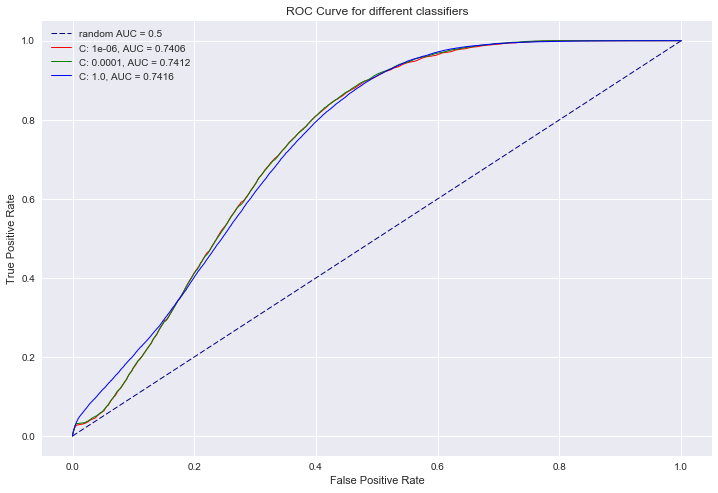

time: 3.08 s


In [42]:
colors = ['r', 'g', 'b', 'y', 'k', 'c', 'm', 'brown', 'r']
lw = 1
Cs = [1e-6, 1e-4, 1e0]

plt.figure(figsize=(12,8))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for different classifiers')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

labels = []
for idx, C in enumerate(Cs):
    clf = LogisticRegression(C = C,class_weight ='balanced')
    clf.fit(X_train, y_train)
    print("C: {}, parameters {} and intercept {}".format(C, clf.coef_, clf.intercept_))
    fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=lw, color=colors[idx])
    labels.append("C: {}, AUC = {}".format(C, np.round(roc_auc, 4)))

plt.legend(['random AUC = 0.5'] + labels)

C: 1e-06, parameters [[ 0.  0.  0.  0.  0.]] and intercept [ 0.]
C: 0.0001, parameters [[ 0.  0.  0.  0.  0.]] and intercept [-0.38286443]
C: 1.0, parameters [[-13.54216951   3.93494769  10.39837252 -12.70630669   3.29716533]] and intercept [-1.29641751]


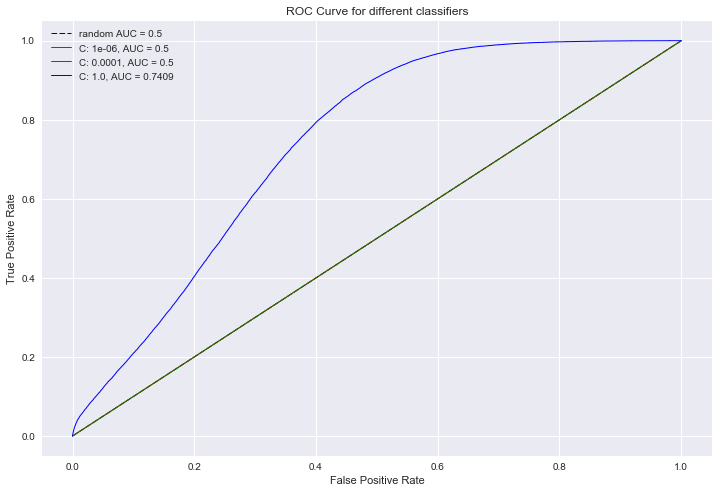

time: 11 s


In [40]:
colors = ['r', 'g', 'b', 'y', 'k', 'c', 'm', 'brown', 'r']
lw = 1
Cs = [1e-6, 1e-4, 1e0]

plt.figure(figsize=(12,8))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for different classifiers')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

labels = []
for idx, C in enumerate(Cs):
    clf = LogisticRegression(C = C,penalty='l1')
    clf.fit(X_train, y_train)
    print("C: {}, parameters {} and intercept {}".format(C, clf.coef_, clf.intercept_))
    fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=lw, color=colors[idx])
    labels.append("C: {}, AUC = {}".format(C, np.round(roc_auc, 4)))

plt.legend(['random AUC = 0.5'] + labels)

C: 1e-06, parameters [[ 0.  0.  0.  0.  0.]] and intercept [ 0.]
C: 0.0001, parameters [[ 0.          0.          0.          0.          0.20314178]] and intercept [ 0.]
C: 1.0, parameters [[-13.27680107   5.12985971  10.15703007 -14.19318441   3.56905971]] and intercept [-0.88392747]


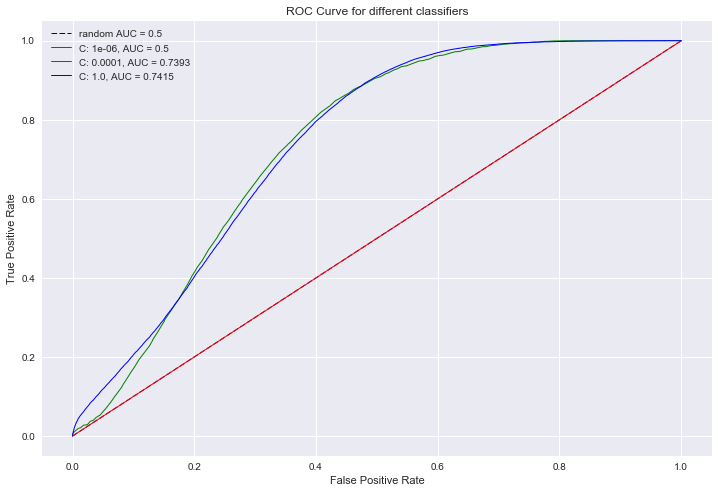

time: 11.2 s


In [41]:
colors = ['r', 'g', 'b', 'y', 'k', 'c', 'm', 'brown', 'r']
lw = 1
Cs = [1e-6, 1e-4, 1e0]

plt.figure(figsize=(12,8))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for different classifiers')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

labels = []
for idx, C in enumerate(Cs):
    clf = LogisticRegression(C = C,penalty='l1',class_weight ='balanced')
    clf.fit(X_train, y_train)
    print("C: {}, parameters {} and intercept {}".format(C, clf.coef_, clf.intercept_))
    fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=lw, color=colors[idx])
    labels.append("C: {}, AUC = {}".format(C, np.round(roc_auc, 4)))

plt.legend(['random AUC = 0.5'] + labels)

In [20]:
def normalized_word_share(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split()))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split()))    
    return 1.0 * len(w1 & w2)/(len(w1) + len(w2))

dftest = pd.read_csv("test.csv").fillna("")

dftest['q1len'] = dftest['question1'].str.len()
dftest['q2len'] = dftest['question2'].str.len()

dftest['q1_n_words'] = dftest['question1'].apply(lambda row: len(row.split(" ")))
dftest['q2_n_words'] = dftest['question2'].apply(lambda row: len(row.split(" ")))

dftest['word_share'] = dftest.apply(normalized_word_share, axis=1)

dftest.head()

,test_id,question1,question2,q1len,q2len,q1_n_words,q2_n_words,word_share
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...,57,68,11,14,0.083333
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?,66,43,14,7,0.190476
2,2,What but is the best way to send money from Ch...,What you send money to China?,60,29,14,6,0.222222
3,3,Which food not emulsifiers?,What foods fibre?,27,17,4,3,0.000000
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?,32,30,4,6,0.300000


time: 2min 17s


In [21]:
retrained = cv.best_estimator_.fit(X, y)

X_submission = scaler.transform(dftest[['q1len', 'q2len', 'q1_n_words', 'q2_n_words', 'word_share']])

y_submission = retrained.predict_proba(X_submission)[:,1]

submission = pd.DataFrame({'test_id': dftest['test_id'], 'is_duplicate': y_submission})
submission.head()

,is_duplicate,test_id
0,0.162429,0
1,0.355707,1
2,0.438766,2
3,0.153393,3
4,0.509066,4


time: 16.3 s


In [23]:
submission.to_csv("submission1.csv", index=False)

time: 3.8 s


In [49]:
df['pred_prob']=retrained.predict_proba(X)[:,1]

time: 32 ms


In [56]:
df['pred']=np.round(df['pred_prob'],0).astype(int)

time: 16 ms


In [57]:
df.head()

,id,qid1,qid2,q1,q2,is_d,q1len,q2len,q1_n_words,q2_n_words,word_share,pred_prob,pred
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12,0.434783,0.688574,1
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13,0.200000,0.293928,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10,0.166667,0.266748,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9,0.000000,0.144650,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7,0.100000,0.180900,0


time: 15 ms


In [61]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


time: 31 ms


In [62]:
from sklearn.metrics import classification_report, confusion_matrix
cnf_matrix = confusion_matrix(df['is_d'], df['pred'])

time: 401 ms


Confusion matrix, without normalization
[[200966  54061]
 [ 84761  64502]]


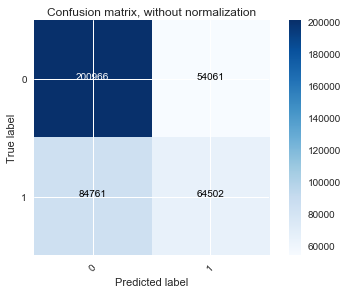

time: 286 ms


In [70]:
#plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=[0,1],
                      title='Confusion matrix, without normalization')

In [64]:
print classification_report(df['is_d'], df['pred'])

             precision    recall  f1-score   support

          0       0.70      0.79      0.74    255027
          1       0.54      0.43      0.48    149263

avg / total       0.64      0.66      0.65    404290

time: 145 ms


In [65]:
cv.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Error in callback <bound method LineWatcher.stop of <autotime.LineWatcher object at 0x000000000B2B7860>> (for post_run_cell):


AssertionError: 